In [1]:
import os
os.chdir('..')

import numpy as np
import json
from systems import LotkaVolterra
from lightning_module import PreTrainLightning
from models import TSMVAE
import torch

from inference_utils import load_pretrained_model

In [2]:
model = load_pretrained_model(
    model_class=TSMVAE,
    lightning_class=PreTrainLightning,
    checkpoint_substr="TSMVAE",
    folder_name='/home/jp4474/latent-abc-smc/lotka_d64_ed32_6_4_4_4_ae_mask_0.15_noise_0.5',)

Successfully loaded model


In [3]:
lotka_abc = LotkaVolterra(model=model, pooling_method='no_cls',)

INFO:viaABC:Initializing ViaABC class
INFO:viaABC:Model updated
INFO:viaABC:viaABC class initialized with the following parameters:
INFO:viaABC:num_parameters: 2
INFO:viaABC:Mu: [0 0]
INFO:viaABC:Sigma: [10 10]
INFO:viaABC:t0: 0
INFO:viaABC:tmax: 15
INFO:viaABC:time_space: [ 1.1  2.4  3.9  5.6  7.5  9.6 11.9 14.4]
INFO:viaABC:pooling_method: no_cls
INFO:viaABC:metric: pairwise_cosine


In [4]:
observational_data = np.load('/home/jp4474/latent-abc-smc/data/Lotka/lotka_data.npz')['obs_data']

In [5]:
with torch.no_grad():
    pred = model(torch.from_numpy(observational_data).float().unsqueeze(0).to(model.device))[-1].squeeze(0).cpu().numpy()

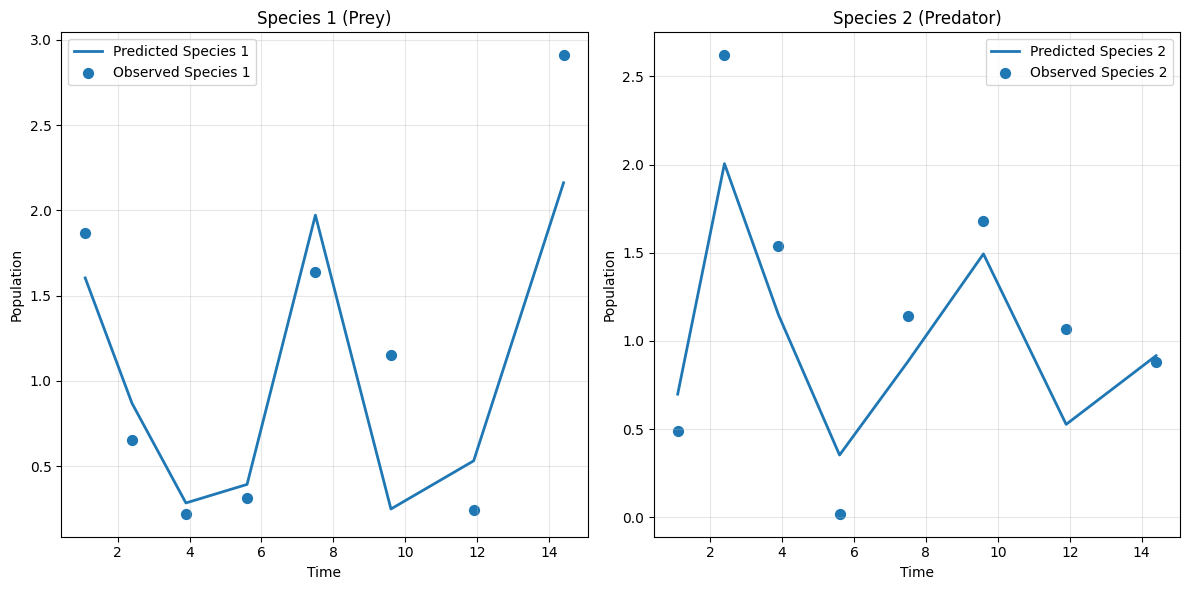

In [7]:
# plot pred as lines, observational_data as points
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot both species (variables) separately
plt.subplot(1, 2, 1)
plt.plot(lotka_abc.time_space, pred[:, 0], label='Predicted Species 1', linewidth=2)
plt.scatter(lotka_abc.time_space, observational_data[:, 0], label='Observed Species 1', s=50)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Species 1 (Prey)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(lotka_abc.time_space, pred[:, 1], label='Predicted Species 2', linewidth=2)
plt.scatter(lotka_abc.time_space, observational_data[:, 1], label='Observed Species 2', s=50)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Species 2 (Predator)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
lotka_abc.run(num_particles=250, k=10, q_threshold=0.999)

INFO:viaABC:Starting ABC PMC run with Q Threshold: 0.999
INFO:viaABC:Initialization (generation 0) started
INFO:viaABC:Initialization completed in 8.79 seconds
INFO:viaABC:Mean: [1.51654302 1.97535938]
INFO:viaABC:Median: [1.49607077 1.70335139]
INFO:viaABC:Variance: [0.61302278 1.47505963]
INFO:viaABC:Generation 1 started
100%|██████████| 250/250 [00:05<00:00, 47.39it/s]
INFO:viaABC:ABC-SMC: Epsilon : 0.16513
INFO:viaABC:ABC-SMC: Quantile : 0.81854
INFO:viaABC:ABC-SMC: Simulations : 447
INFO:viaABC:Mean: [1.51787451 1.91100327]
INFO:viaABC:Median: [1.40264019 1.70918535]
INFO:viaABC:Variance: [0.69928166 1.73531903]
INFO:viaABC:Generation 1 completed in 6.26 seconds
INFO:viaABC:Generation 2 started
100%|██████████| 250/250 [00:06<00:00, 36.06it/s]
INFO:viaABC:ABC-SMC: Epsilon : 0.13184
INFO:viaABC:ABC-SMC: Quantile : 0.63154
INFO:viaABC:ABC-SMC: Simulations : 578
INFO:viaABC:Mean: [1.26781239 2.08112457]
INFO:viaABC:Median: [1.26393015 1.86104893]
INFO:viaABC:Variance: [0.35148076 1.4

KeyboardInterrupt: 